In [16]:
#Download raw files for 12 months data and combine to one csv file
import os
import pandas as pd

folder = r"C:\Users\myaea\Dropbox\My PC (LAPTOP-8MURVIGK)\Desktop\Case Study 1\zip files\1year_Data"
df=[]
for file in os.listdir(folder):
    if file.endswith('.csv'):
        print("Loading file {0}...".format(file))
        df.append(pd.read_csv(os.path.join(folder,file)))

df_combine=pd.concat(df,join='outer')
df_combine.to_csv(r"C:\Users\myaea\Dropbox\My PC (LAPTOP-8MURVIGK)\Desktop\Data Analysis\github\12months_DATA_Combine_PYTHON.csv",index=False)

Loading file 202208-divvy-tripdata.csv...
Loading file 202209-divvy-publictripdata.csv...
Loading file 202210-divvy-tripdata.csv...
Loading file 202211-divvy-tripdata.csv...
Loading file 202212-divvy-tripdata.csv...
Loading file 202301-divvy-tripdata.csv...
Loading file 202302-divvy-tripdata.csv...
Loading file 202303-divvy-tripdata.csv...
Loading file 202304-divvy-tripdata.csv...
Loading file 202305-divvy-tripdata.csv...
Loading file 202306-divvy-tripdata.csv...
Loading file 202307-divvy-tripdata.csv...


In [2]:
#Data cleaning of combine file to find ride_length(ended-started) and day_of_week(started_weekday) values
import pandas as pd
df1=pd.read_csv(r"C:\Users\myaea\Dropbox\My PC (LAPTOP-8MURVIGK)\Desktop\Data Analysis\github\12months_DATA_Combine_PYTHON.csv")

df1.drop_duplicates()
df1=df1.dropna()
df1[['started_at_date','started_at_time']]=df1['started_at'].str.split(' ',expand=True)
df1[['ended_at_date','ended_at_time']]=df1['ended_at'].str.split(' ',expand=True)

df1['started_at_time']= pd.to_datetime(df1.started_at_time,format='%H:%M:%S')
df1['ended_at_time']= pd.to_datetime(df1.ended_at_time,format='%H:%M:%S')

df1['ride_length_total']=df1['ended_at_time']-df1['started_at_time']
df1=df1.astype({'ride_length_total':'string'})
df1[['n','a','ride_length']]=df1['ride_length_total'].str.split(' ',expand=True)

df1['started_at']=pd.to_datetime(df1.started_at)
df1['started_at_date']=df1['started_at'].dt.date
df1['day_of_week']=df1['started_at'].dt.day_name()

df1=df1.drop(columns=['started_at_date','started_at_time','ended_at_date','ended_at_time','ride_length_total','n','a'])
df1.to_csv(r"C:\Users\myaea\Dropbox\My PC (LAPTOP-8MURVIGK)\Desktop\Data Analysis\github\12months_DATA_Clean_PYTHON.csv")

In [24]:
df1.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length           string[python]
day_of_week                   object
dtype: object

In [3]:
#Select some columns to analyze data
df2=df1[['ride_id','rideable_type','started_at','ended_at','member_casual','ride_length','day_of_week']]
df2

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,casual,00:09:04,Friday
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,casual,00:00:45,Thursday
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,casual,01:01:38,Sunday
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,casual,00:14:18,Sunday
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,casual,01:32:38,Sunday
...,...,...,...,...,...,...,...
5723294,3B228F52743C58B7,classic_bike,2023-07-21 13:13:48,2023-07-21 15:08:04,casual,01:54:16,Friday
5723400,67BE62CFD9B1E3EA,electric_bike,2023-07-17 13:45:41,2023-07-17 13:45:43,member,00:00:02,Monday
5723491,E771BD59731AEC4D,electric_bike,2023-07-26 18:05:32,2023-07-26 18:18:23,member,00:12:51,Wednesday
5723550,70B7A0759219DB7E,electric_bike,2023-07-13 13:38:44,2023-07-13 13:39:21,member,00:00:37,Thursday


In [4]:
#Which day people use bikes most or last 
df2.groupby('member_casual').agg({'day_of_week':['max','min']})

day_of_week        
                      max     min
member_casual                    
casual          Wednesday  Friday
member          Wednesday  Friday

In [5]:
#Which kind of bike people use most or last
df2.groupby('member_casual').agg({'rideable_type':['max','min']})

rideable_type              
                         max           min
member_casual                             
casual         electric_bike  classic_bike
member         electric_bike  classic_bike

In [6]:
#Analyze people use max or min ride_time for each day
df2.groupby(['member_casual','day_of_week']).agg({'ride_length':['max','min']})

ride_length           
                                  max        min
member_casual day_of_week                       
casual        Friday         17:03:09  +00:00:46
              Monday         20:54:08  +00:00:54
              Saturday       21:28:15  +00:00:33
              Sunday         22:52:57  +00:01:15
              Thursday       20:04:58  +00:00:21
              Tuesday        22:28:28  +00:02:19
              Wednesday      21:58:32  +00:01:13
member        Friday         19:25:47  +00:01:42
              Monday         12:13:54  +00:01:01
              Saturday       18:59:45  +00:01:11
              Sunday         17:21:20  +00:01:42
              Thursday       15:15:39  +00:00:25
              Tuesday        18:27:40  +00:00:13
              Wednesday      14:07:08  +00:01:21

c:\Users\myaea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


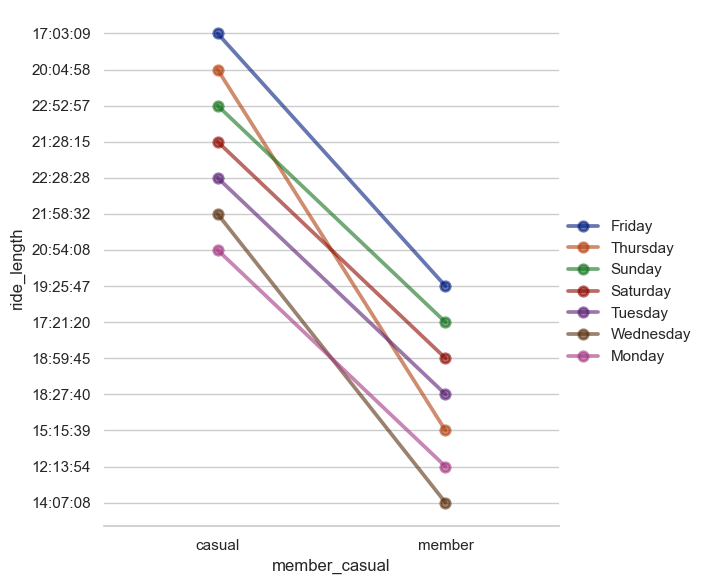

In [73]:
import seaborn as sns
df_p=df2.groupby(['member_casual','day_of_week'],sort=False).agg({'ride_length':'max'})
sns.set_theme(style="whitegrid")
g= sns.catplot(data=df_p,kind="point",x="member_casual", y="ride_length", hue="day_of_week",errorbar="sd",  palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("member_casual", "ride_length")
g.legend.set_title("")

c:\Users\myaea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


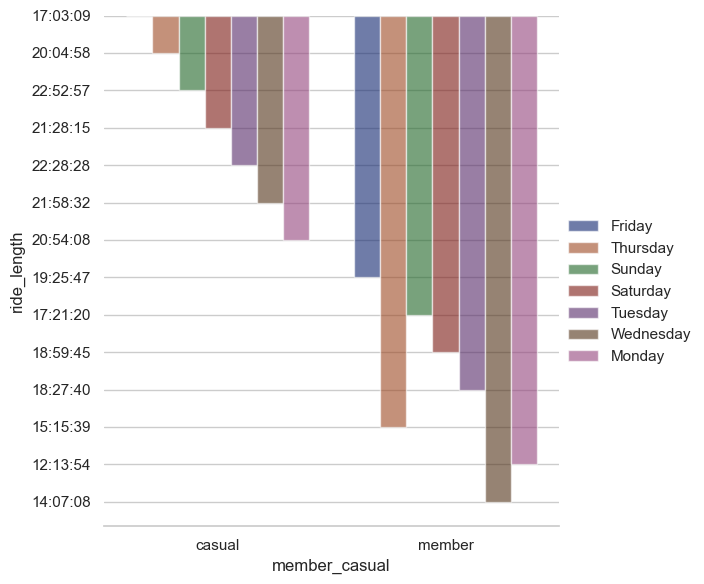

In [74]:
import seaborn as sns
df_p=df2.groupby(['member_casual','day_of_week'],sort=False).agg({'ride_length':'max'})
sns.set_theme(style="whitegrid")
g= sns.catplot(data=df_p,kind="bar",x="member_casual", y="ride_length", hue="day_of_week",errorbar="sd",  palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("member_casual", "ride_length")
g.legend.set_title("")